# Principles of supervised learning

## Learning objectives

- Define how a supervised ML system can be formalized.
- Develop an intuition of learning via gradient descent.

## Environment setup

In [1]:
import platform
from IPython.display import YouTubeVideo

print(f"Python version: {platform.python_version()}")

Python version: 3.11.1


## Terminology

### Components of a supervised ML system

- Some **data** to learn from.
- A **model** to transform data into results.
- A **loss function** to quantify how well (or badly) the model is doing.
- An **optimization algorithm** to update the model according to the loss function.

### Data

#### Features

A **feature** is an attribute (property) of the data given to the model: the number of rooms in a house, the color of a pixel in an image, the presence of a specific word in a text, etc. Most of the time, they come under numerical form.

A simple ML project might use a single feature, while more sophisticated ones could use millions of them.

They are denoted using the $x$ variable.

#### Label

A **label** (or **class** in the context of classification), is a result the model is trying to predict: the future price of an asset, the nature of the animal shown in a picture, the presence or absence of a face, etc.

They are denoted using the $y$ variable.

#### Samples

An **sample**, also called **example**, is a particular instance of data: an individual email, an image, etc.

A **labeled sample** includes both its feature(s) and the associated label(s) to predict. An **unlabeled sample** includes only feature(s).

#### Inputs

**Inputs** correspond to all features for one sample of the dataset.

They are denoted using the $\pmb{x}$ variable (notice the boldface to indicate that it is a vector).

$$\pmb{x}^{(i)} = \begin{pmatrix}
       \ x^{(i)}_1 \\
       \ x^{(i)}_2 \\
       \ \vdots \\
       \ x^{(i)}_n
     \end{pmatrix}$$

- $m$: number of samples in the dataset.
- $n$: number of features for one sample.
- $\pmb{x}^{(i)}, i \in [1,m]$: vector of $n$ features.
- $x^{(i)}_j, j \in [1,n]$: value of the $j$th feature for the $i$th data sample..

#### Targets

**Targets** are the expected results (labels) associated to a data sample, often called the *ground truth*. They are denoted using the $\pmb{y}$ variable.

Some ML models have to predict more than one value for each sample (for example, in multiclass classification).

$$\pmb{y}^{(i)} = \begin{pmatrix}
       \ y^{(i)}_1 \\
       \ y^{(i)}_2 \\
       \ \vdots \\
       \ y^{(i)}_t
     \end{pmatrix}$$

- $K$: number of labels associated to a data sample.
- $\pmb{y}^{(i)}, i \in [1,m]$: vector of $K$ labels.
- $y^{(i)}_t, k \in [1,K]$: value of the $k$th label for the $i$th sample.

#### Inputs matrix

Many ML models expect their inputs to come under the form of a $m \times n$ matrix, often called **design matrix** and denoted $\pmb{X}$.

$$\pmb{X} = \begin{bmatrix}
       \ \pmb{x}^{(1)T} \\
       \ \pmb{x}^{(2)T} \\
       \ \vdots \\
       \ \pmb{x}^{(m)T} \\
     \end{bmatrix} =
\begin{bmatrix}
       \ x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_n \\
       \ x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_n \\
       \ \vdots & \vdots & \ddots & \vdots \\
       \ x^{(m)}_1 & x^{(m)}_2 & \cdots & x^{(m)}_n
     \end{bmatrix}$$

#### Targets matrix

Accordingly, expected results are often stored in a $m \times K$ matrix denoted $\pmb{Y}$.

$$\pmb{Y} = \begin{bmatrix}
       \ \pmb{y}^{(1)T} \\
       \ \pmb{y}^{(2)T} \\
       \ \vdots \\
       \ \pmb{y}^{(m)T} \\
     \end{bmatrix} =
\begin{bmatrix}
       \ y^{(1)}_1 & y^{(1)}_2 & \cdots & y^{(1)}_t \\
       \ y^{(2)}_1 & y^{(2)}_2 & \cdots & y^{(2)}_t \\
       \ \vdots & \vdots & \ddots & \vdots \\
       \ y^{(m)}_1 & y^{(m)}_2 & \cdots & y^{(m)}_t
     \end{bmatrix}$$

### Model

The representation learnt from data during training is called a **model**. It defines the relationship between features and labels.

Most (but not all) ML systems are model-based.

[![Extract from the book Hands-on Machine Learning with Scikit-Learn & TensorFlow by A. Géron](_images/instance_model_learning.png)](https://github.com/ageron/handson-ml2)

#### The two phases of a model's life

- **Training**: using labeled samples, the model learns to find a relationship between features and labels.
- **Inference**: the trained model is used to make predictions on unlabeled samples (new data unseen during training).

#### Model parameters and hyperparameters

**Parameters**, sometimes called **weights**, are the internal values that affect the computed output of a model. During the training phase, they are algorithmically adjusted for optimal performance w.r.t the loss function. The set of parameters for a model is denoted $\pmb{\omega}$ or $\pmb{\theta}$.

They are not to be confused with **hyperparameters**, which are configuration properties that constrain the model: the maximum depth of a decision tree, the number of layers in a neural networks, etc. Hyperparameters are statically defined before training by the user or by a dedicated tool.

#### Hypothesis function

Mathamatically speaking, a model is a function of the inputs that depends on its parameters and computes results (which will be compared to targets during the training process).

This function, called the **hypothesis function**, is denoted $h_{\pmb{\omega}}$ to show that it is parametrized by $\pmb{\omega}$. Its output (predicted result) is denoted  $\pmb{y'}$ or $\hat{\pmb{y}}$.

$$\pmb{y'}^{(i)} = h_{\pmb{\omega}}(\pmb{x}^{(i)})$$
$$\pmb{Y'} = h_{\pmb{\omega}}(\pmb{X})$$

- $\pmb{y'}^{(i)}, i \in [1,m]$: predicted output for the $i$th sample.
- $\pmb{Y'}$: predictions matrix for the whole dataset.

### Loss function

The **loss function**, also called **cost function** or **objective function**, quantifies the difference, often called **error**, between targets (expected results) and actual results computed by the model. Its value at any given time is a scalar called the **loss value**, or simply **loss**.

By convention, loss functions are usually defined so that lower is better, hence their name. If the model's prediction is perfect, the loss value is zero.

The loss function is generally denoted $\mathcal{L}$ or $\mathcal{J}$. Mathematically, it depends on the inputs $\pmb{X}$, the expected results $\pmb{Y}$ and the model parameters $\pmb{\omega}$. However, during model training, $\pmb{X}$ and $\pmb{Y}$ can be treated as constants. Thus, the loss function depends solely on $\pmb{\omega}$ and will be denoted $\mathcal{L(\pmb{\omega})}$.

#### Loss function example

The choice of the loss function depends on the problem type.

For regression tasks, a popular choice is the **Mean Squared Error** a.k.a. *squared L2 norm*.

$$\mathcal{L}_{\mathrm{MSE}}(\pmb{\omega}) = \frac{1}{m}\sum_{i=1}^m (h_{\pmb{\omega}}(\pmb{x}^{(i)}) - \pmb{y}^{(i)})^2 = \frac{1}{m}{{\lVert{h_{\pmb{\omega}}(\pmb{X}) - \pmb{Y}}\rVert}_2}^2$$

### Optimization algorithm

Used only during the training phase, it aims at finding the set of model parameters (denoted $\pmb{\omega^*}$ or $\pmb{\theta^*}$) that minimizes the loss value.

Depending on the task and the model type, several algorithms of various complexity exist.

[![Untrained Vs trained model](_images/LossSideBySide.png)](https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss)

## Reducing loss via gradient descent

### An iterative approach

The model's parameters are iteratively updated until an optimum is reached.

[![Iterative approach](_images/GradientDescentDiagram.png)](https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss)

### The gradient descent algorithm

- Used in several ML models, including neural networks.
- General idea: converging to a loss function's minimum by updating model parameters in small steps, in the **opposite direction** of the loss function **gradient**.

### The notion of gradient

- Expresses the variation of a function relative to the variation of its parameters.
- Vector containing partial derivatives of the function *w.r.t.* each of its parameters.

$$\nabla_{\pmb{\omega}}\mathcal{L}(\pmb{\omega}) = \begin{pmatrix}
       \ \frac{\partial}{\partial \omega_1} \mathcal{L}(\pmb{\omega}) \\
       \ \frac{\partial}{\partial \omega_2} \mathcal{L}(\pmb{\omega}) \\
       \ \vdots \\
     \end{pmatrix}$$

- $\nabla_{\pmb{\omega}}\mathcal{L}(\pmb{\omega})$: gradient of loss function $\mathcal{L}(\pmb{\omega})$.

#### 1D gradient descent (one parameter)

![Gradient Descent](_images/gradient_descent_1parameter.png)

#### 2D gradient descent (two parameters)

![Tangent Space](_images/tangent_space.png)

#### Dynamics of a 2D gradient descent

[![Gradient descent line graph](_images/gradient_descent_line_graph.gif)](https://alykhantejani.github.io/a-brief-introduction-to-gradient-descent/)

### Gradient descent types

#### Batch Gradient Descent

The gradient is computed on the whole dataset before model parameters are updated.

- Advantages: simple and safe (always converges in the right direction).
- Drawback: can become slow and even untractable with a big dataset.

#### Stochastic Gradient Descent (SGD)

The gradient is computed on only one randomly chosen sample whole dataset before parameters are updated.

- Advantages:
  - Very fast.
  - Enables learning from each new sample (*online learning*).
- Drawback:
  - Convergence is not guaranteed.
  - No vectorization of computations.

#### Mini-Batch SGD

The gradient is computed on a small set of samples, called a *batch*, before parameters are updated.

- Combines the advantages of batch and stochastic GD.
- Default method for many ML libraries.
- The mini-batch size varies between 10 and 1000 samples, depending of the dataset size.

### Model parameters update

#### Learning rate

$\eta$ (sometimes denoted $\alpha$ or $\lambda$) is the update factor for parameters once gradient is computed, called the **_learning rate_**.

It has a direct impact on the "speed" of the gradient descent.

$$\pmb{\omega_{t+1}} = \pmb{\omega_t} - \eta\nabla_{\pmb{\omega}}\mathcal{L}(\pmb{\omega_t})$$

- $\pmb{\omega_{t}}$: set of parameters at step $t$ of the gradient descent.
- $\pmb{\omega_{t+1}}$: set of parameters at step $t+1$ (after update).

#### Impact of learning rate

[![Learning rate](_images/learning_rate.png)](https://developers.google.com/machine-learning/crash-course/fitter/graph)

#### The local minima problem

![Local minima](_images/local_minima.jpg)

![Gradient Descent](_images/gd_ng.jpg)

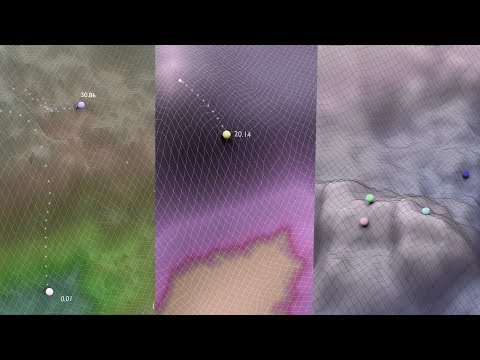

In [3]:
YouTubeVideo("Q3pTEtSEvDI")

### Gradient descent optimization algorithms

#### Gradient descent evolution map

[![Gradient Descent evolution map](_images/gradient_descent_evolution_map.png)](https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9)

#### Momentum

Momentum optimization accelerates the descent speed in the direction of the minimum by accumulating previous gradients. It can also escape plateaux faster then plain GD.

[![Momemtum demo](_images/gd_momentum_demo.gif)](https://youtu.be/qPKKtvkVAjY)

##### Momentum equations

$$\pmb{m_{t+1}} = \beta_t \pmb{m_t} - \nabla_{\pmb{\omega}}\mathcal{L}(\pmb{\omega_t})$$

$$\pmb{\omega_{t+1}} = \pmb{\omega_t} + \eta_t\pmb{m_{t+1}}$$

- $\pmb{m_t}$: momentum at step $t$.
- $\beta_t \in [0,1]$: friction factor that prevents gradients updates from growing too large. A typical value is $0.9$.

##### Momentum Vs plain GD

[![Momentum Vs plain GD](_images/gd_momentum.png)](https://youtu.be/kVU8zTI-Od0)

#### RMSprop

*RMSprop* decays the learning rate differently for each parameter, scaling down the gradient vector along the steepest dimensions. The underlying idea is to adjust the descent direction a bit more towards the global minimum.

$$\pmb{v_{t+1}} = \beta_t \pmb{v_t} + (1-\beta_t) \left(\nabla_{\pmb{\omega}}\mathcal{L}(\pmb{\omega_t})\right)^2$$

$$\pmb{\omega_{t+1}} = \pmb{\omega_t} - \frac{\eta}{\sqrt{\pmb{v_{t}}+\epsilon}}\nabla_{\pmb{\omega}}\mathcal{L}(\pmb{\omega_t})$$

- $\pmb{v_t}$: moving average of squared gradients at step $t$.
- $\epsilon$: smoothing term to avoid divisions by zero. A typical value is $10^{-10}$.

#### Adam and other techniques

*Adam* (*Adaptive Moment Estimation*) combines the ideas of momentum and RMSprop. It is the *de facto* choice nowadays.

Gradient descent optimization is a rich subfield of Machine Learning. Read more in [this article](http://ruder.io/optimizing-gradient-descent/).